In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
df = pd.read_csv('Bank_Additional.csv',';')
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<AxesSubplot:title={'center':'Distribution of target variables'}>

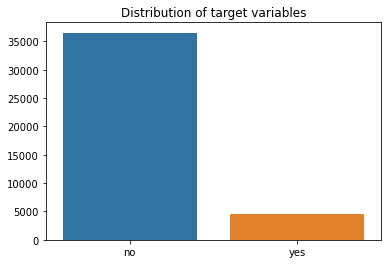

In [158]:
plt.title('Distribution of target variables')
sns.barplot(x = list(df.y.value_counts().index), y = list(df.y.value_counts().values))

In [159]:
#Exploratory data Analysis
#we will try to analyze the dataset columns wise

In [160]:
#job
df.job.isna().sum()

0

In [161]:
df.job.value_counts()
#admin is the most privalent job in the list followed by blue-collared workers and least number is from house maid

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [162]:
jobdf = pd.DataFrame()
jobdf['yes'] = df[df['y']=='yes']['job'].value_counts()
jobdf['no'] = df[df['y']=='no']['job'].value_counts()
jobdf

,yes,no
admin.,1352,9070
technician,730,6013
blue-collar,638,8616
retired,434,1286
management,328,2596
services,323,3646
student,275,600
self-employed,149,1272
unemployed,144,870
entrepreneur,124,1332


<AxesSubplot:>

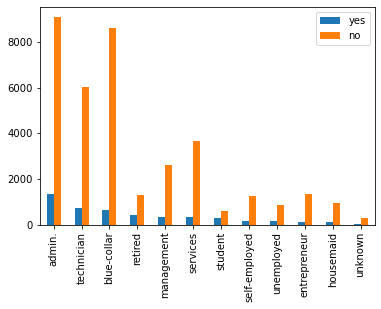

In [163]:
jobdf.plot.bar()

In [164]:
#age of different occupations
df[['job','age']].groupby('job').mean().sort_values(by = 'age',ascending = False)
#retired people have the highest average obviously followed by housemaids and management professionals. the youngest
#customers are students

,age
job,
retired,62.027326
unknown,45.563636
housemaid,45.500000
management,42.362859
entrepreneur,41.723214
self-employed,39.949331
unemployed,39.733728
blue-collar,39.555760
technician,38.507638


In [165]:
#success rate of closing a deal among customers with various jobs
job_tit = list(df['job'].value_counts().index)
job_per = []
for jo in job_tit:
    percent = ((df[df['job']== jo]['y'] == 'yes').sum()/df.job.value_counts()[jo])*100
    job_per.append(percent)

In [166]:
job_tit = pd.Series(job_tit)
job_per = pd.Series(job_per)

pd.concat([job_tit,job_per], axis = 1)

#out of all the professions retired and students are more chances to accept the offer made by the caller and hardest to
#crack would be blue-collar employees, entrepreneurs and services professionals

,0,1
0,admin.,12.972558
1,blue-collar,6.894316
2,technician,10.826042
3,services,8.138070
4,management,11.217510
5,retired,25.232558
6,entrepreneur,8.516484
7,self-employed,10.485574
8,housemaid,10.000000
9,unemployed,14.201183


In [167]:
#marital column
df['marital'].value_counts()

#a major pie of the customers are married

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

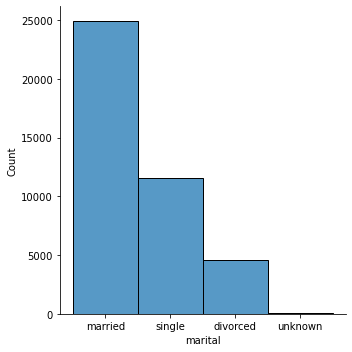

In [168]:
sns.displot(df.marital)

In [169]:
df_mar = pd.DataFrame()
df_mar['yes'] = df[df['y']=='yes']['marital'].value_counts()
df_mar['no'] = df[df['y']=='no']['marital'].value_counts()
df_mar

,yes,no
married,2532,22396
single,1620,9948
divorced,476,4136
unknown,12,68


<AxesSubplot:>

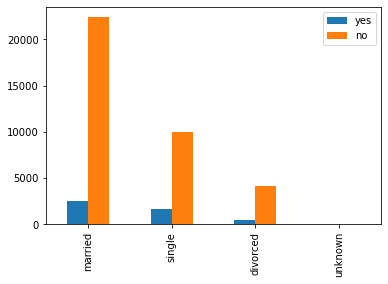

In [170]:
df_mar.plot.bar()

In [171]:
#success rate of deposits among various maritals
mari_tit = list(df['marital'].value_counts().index)
mari_per = []
for mari in mari_tit:
    percent = ((df[df['marital']== mari]['y'] == 'yes').sum()/df.marital.value_counts()[mari])*100
    mari_per.append(percent)
    
mari_tit = pd.Series(mari_tit)
mari_per = pd.Series(mari_per)

pd.concat([mari_tit,mari_per], axis = 1)

#singles and people with unknown marital status tend to be more possible to accept the sales campaign thatn married and divorced

,0,1
0,married,10.157253
1,single,14.004149
2,divorced,10.320902
3,unknown,15.000000


In [172]:
#education
df['education'].value_counts()
#majority of the bank clienele have a university degree or high school degree. illiterates are in the least number
#among all the education backgrounds

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [173]:
df_edu = pd.DataFrame()
df_edu['yes'] = df[df['y']=='yes']['education'].value_counts()
df_edu['no'] = df[df['y']=='no']['education'].value_counts()
df_edu

,yes,no
university.degree,1670,10498
high.school,1031,8484
professional.course,595,4648
basic.9y,473,5572
basic.4y,428,3748
unknown,251,1480
basic.6y,188,2104
illiterate,4,14


<AxesSubplot:>

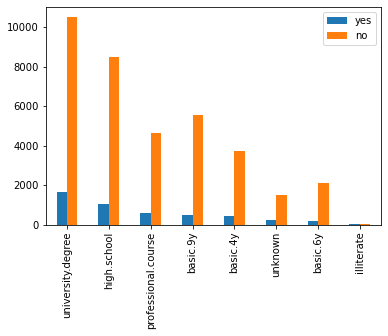

In [174]:
df_edu.plot.bar()

In [175]:
#success rate of deposits among various education
edu_tit = list(df['education'].value_counts().index)
edu_per = []
for edu in edu_tit:
    percent = ((df[df['education']== edu]['y'] == 'yes').sum()/df.education.value_counts()[edu])*100
    edu_per.append(percent)
    
edu_tit = pd.Series(edu_tit)
edu_per = pd.Series(edu_per)

pd.concat([edu_tit,edu_per], axis = 1)
    
#illeterate people tend to be more accepting the campaign than anyother educational backgrounds followed by 
#people with unknown and university degree educational backgrounds

,0,1
0,university.degree,13.724523
1,high.school,10.835523
2,basic.9y,7.824648
3,professional.course,11.348465
4,basic.4y,10.249042
5,basic.6y,8.202443
6,unknown,14.500289
7,illiterate,22.222222


In [176]:
#default

df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

<AxesSubplot:>

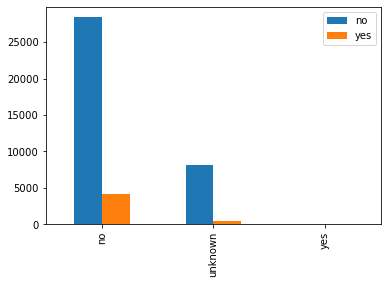

In [177]:
df_def = pd.DataFrame()
df_def['no'] = df[df['y']=='no']['default'].value_counts()
df_def['yes'] = df[df['y']=='yes']['default'].value_counts()

df_def.plot.bar()

In [178]:
#success rate of deposits among various default
def_tit = list(df['default'].value_counts().index)
def_per = []
for defi in def_tit:
    percent = ((df[df['default']== defi]['y'] == 'yes').sum()/df.default.value_counts()[defi])*100
    def_per.append(percent)
    
def_tit = pd.Series(def_tit)
def_per = pd.Series(def_per)

pd.concat([def_tit,def_per], axis = 1)
    

#people with no default history have more chances to accept the campaingn and people with any default history will never
#accept the term deposit proposal

,0,1
0,no,12.878974
1,unknown,5.152960
2,yes,0.000000


In [179]:
#housing

df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

<AxesSubplot:>

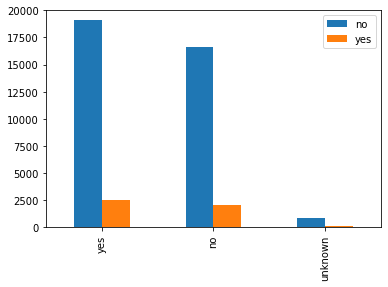

In [180]:
hou_df = pd.DataFrame()
hou_df['no'] = df[df['y']=='no']['housing'].value_counts()
hou_df['yes'] = df[df['y']=='yes']['housing'].value_counts()
hou_df.plot.bar()

In [182]:
hou_df

,no,yes
yes,19069,2507
no,16596,2026
unknown,883,107


In [183]:
#success rate of deposits among various housing
hou_tit = list(df['housing'].value_counts().index)
hou_per = []
for hou in hou_tit:
    percent = ((df[df['housing']== hou]['y'] == 'yes').sum()/df.housing.value_counts()[hou])*100
    hou_per.append(percent)
    
hou_tit = pd.Series(hou_tit)
hou_per = pd.Series(hou_per)

pd.concat([hou_tit,hou_per], axis = 1)

#success rates are almost the same irrespective whether the customer is having housing loan or not

,0,1
0,yes,11.619392
1,no,10.879605
2,unknown,10.808081


In [184]:
#loan

df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

<AxesSubplot:>

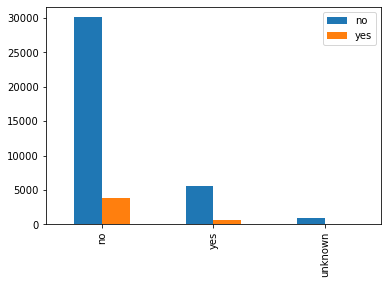

In [185]:
lon_df = pd.DataFrame()
lon_df['no'] = df[df['y']=='no']['loan'].value_counts()
lon_df['yes'] = df[df['y']=='yes']['loan'].value_counts()
lon_df.plot.bar()

In [186]:
#success rate of deposits among various loan
lo_tit = list(df['loan'].value_counts().index)
lo_per = []
for lo in lo_tit:
    percent = ((df[df['loan']== lo]['y'] == 'yes').sum()/df.loan.value_counts()[lo])*100
    lo_per.append(percent)
    
lo_tit = pd.Series(lo_tit)
lo_per = pd.Series(lo_per)

pd.concat([lo_tit,lo_per], axis = 1)

#success rates are almost the same irrespective whether the customer is having existing loans or not

,0,1
0,no,11.340206
1,yes,10.931498
2,unknown,10.808081


In [187]:
#contacts
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

<AxesSubplot:>

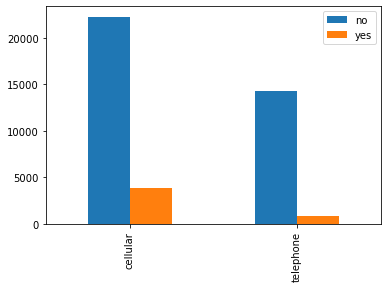

In [188]:
cont_df = pd.DataFrame()
cont_df['no'] = df[df['y']=='no']['contact'].value_counts()
cont_df['yes'] = df[df['y']=='yes']['contact'].value_counts()
cont_df.plot.bar()

In [189]:
#success rate of deposits among various contacts
con_tit = list(df['contact'].value_counts().index)
con_per = []
for con in con_tit:
    percent = ((df[df['contact']== con]['y'] == 'yes').sum()/df.contact.value_counts()[con])*100
    con_per.append(percent)
    
con_tit = pd.Series(con_tit)
con_per = pd.Series(con_per)

pd.concat([con_tit,con_per], axis = 1)

#cellular contacts have more chances of success way more than tradional telephone contacts

,0,1
0,cellular,14.737607
1,telephone,5.231321


In [190]:
#month


In [191]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

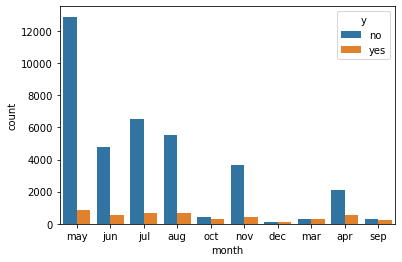

In [192]:
sns.countplot(df.month,hue= df.y)

In [193]:
#success rate of deposits among various months
mo_tit = list(df['month'].value_counts().index)
mo_per = []
for mo in mo_tit:
    percent = ((df[df['month']== mo]['y'] == 'yes').sum()/df.month.value_counts()[mo])*100
    mo_per.append(percent)
    
mo_tit = pd.Series(mo_tit)
mo_per = pd.Series(mo_per)

pd.concat([mo_tit,mo_per], axis = 1)

#campaign is most successful in months october, march, september and december and least possible
#May

,0,1
0,may,6.434745
1,jul,9.046557
2,aug,10.602137
3,jun,10.511470
4,nov,10.143867
5,apr,20.478723
6,oct,43.871866
7,sep,44.912281
8,mar,50.549451
9,dec,48.901099


<AxesSubplot:>

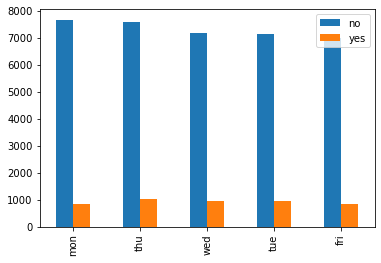

In [194]:
#day of week
dow_df = pd.DataFrame()
dow_df['no'] = df[df['y']=='no']['day_of_week'].value_counts()
dow_df['yes'] = df[df['y']=='yes']['day_of_week'].value_counts()
dow_df.plot.bar()

In [195]:
#success rate of deposits among various day of week
day_tit = list(df['day_of_week'].value_counts().index)
day_per = []
for day in day_tit:
    percent = ((df[df['day_of_week']== day]['y'] == 'yes').sum()/df.day_of_week.value_counts()[day])*100
    day_per.append(percent)
    
day_tit = pd.Series(day_tit)
day_per = pd.Series(day_per)

pd.concat([day_tit,day_per], axis = 1)

#there are almost equal chance of converting a customer on all days of a week

,0,1
0,thu,12.118752
1,mon,9.948320
2,wed,11.667076
3,tue,11.779975
4,fri,10.808739


In [196]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [197]:
#poutcome
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

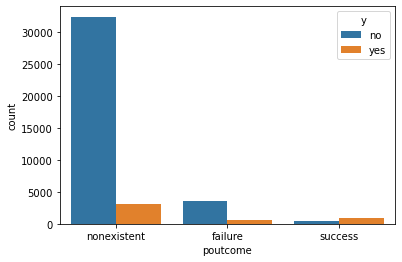

In [198]:
sns.countplot(df.poutcome, hue= df.y)

In [199]:
#success rate of deposits among various poutcome
po_tit = list(df['poutcome'].value_counts().index)
po_per = []
for po in po_tit:
    percent = ((df[df['poutcome']== po]['y'] == 'yes').sum()/df.poutcome.value_counts()[po])*100
    po_per.append(percent)
    
po_tit = pd.Series(po_tit)
po_per = pd.Series(po_per)

pd.concat([po_tit,po_per], axis = 1)
    
#65 percent of the people who accepted the previous campaign accepted the proposal for term deposit too

,0,1
0,nonexistent,8.832213
1,failure,14.228598
2,success,65.112891


In [200]:
#numerical values

In [201]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c41839b400>,
 'caps': [<matplotlib.lines.Line2D at 0x2c418508bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c41839b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c417e08f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c417e08c40>],
 'means': []}

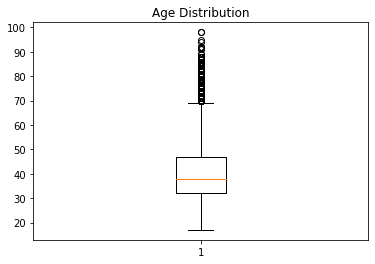

In [202]:
plt.title('Age Distribution')
plt.boxplot(df.age)

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

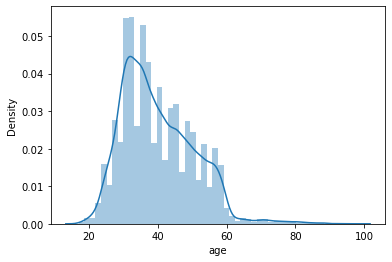

In [203]:
sns.distplot(df.age)

In [204]:
print(max(df.age),'\n',min(df.age))

98 
 17


In [205]:
df.age.isna().sum()

0

In [206]:
#campaign column
df.campaign.value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign', ylabel='count'>

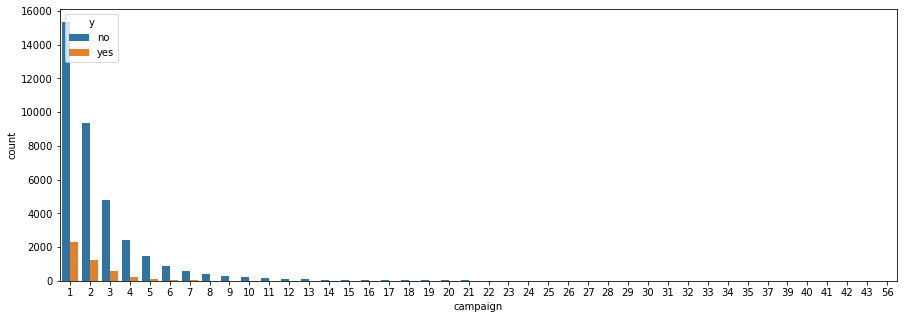

In [207]:
plt.figure(figsize = (15,5))
sns.countplot(df.campaign,hue = df.y)
#most of the customer are called over a few times only. The majority was ony called only one time only while
#more than 50% of these cases where converted to deposits. It is very less to call customers more than
#5 times for sales and interestingly more calls means less chance of converting

In [208]:
#pdays number of days passed after last contact
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [210]:
dfpdays = df[df['pdays']!=999]
ex_cust = len(dfpdays)
first_cust = len(df[df['pdays']==999])
per_new_con = first_cust/(ex_cust+first_cust)
print('People contacted earlier = {}'.format(ex_cust))
print('People contacted for the first time = {}'.format(first_cust))
print('Percentage of Cusomters contacting first time = {}'.format(per_new_con))
#new customers are the majority among people contacted for this campaign
#about 89 percentage of all customers was never contacted before

People contacted earlier = 1515
People contacted for the first time = 39673
Percentage of Cusomters contacting first time = 0.9632174419733903


C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays', ylabel='count'>

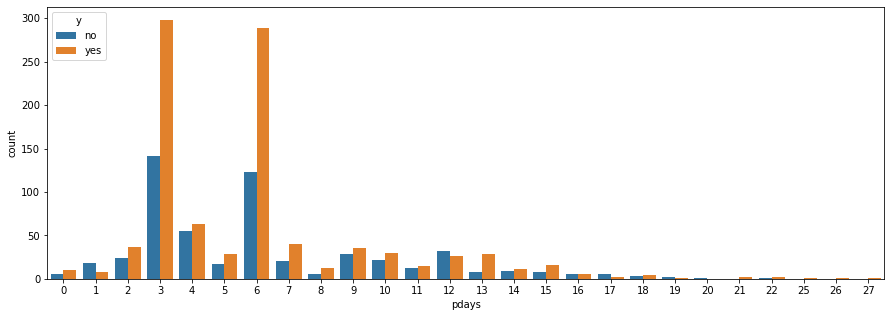

In [211]:
plt.figure(figsize = (15,5))
sns.countplot(dfpdays.pdays,hue= dfpdays.y)

In [212]:
dfpday_out = df[df['pdays']==999]
dfpday_out[['pdays','y']].groupby('y').count()

,pdays
y,
no,36000
yes,3673


In [213]:
len(df[df['campaign']==1])
df.campaign.value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [214]:
#previous
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Contacts on previous campaign'}, xlabel='previous', ylabel='count'>

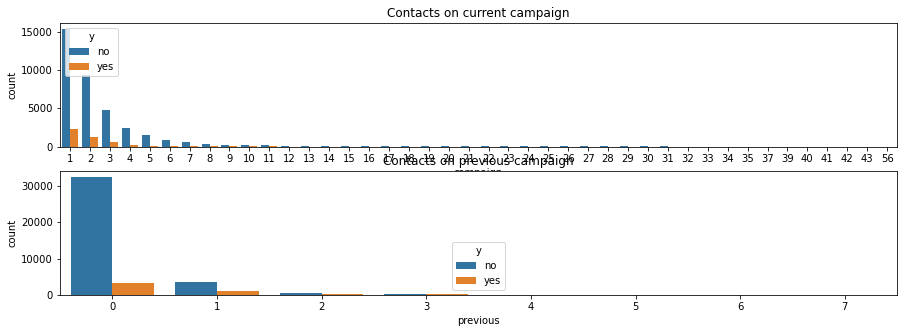

In [215]:
plt.figure(figsize = (15,5))
plt.subplot(2,1,1)
plt.title('Contacts on current campaign')
sns.countplot(df.campaign,hue = df.y)
plt.subplot(2,1,2)
plt.title('Contacts on previous campaign')
sns.countplot(df.previous,hue=  df.y)


C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Contacts on previous campaign'}, xlabel='previous', ylabel='count'>

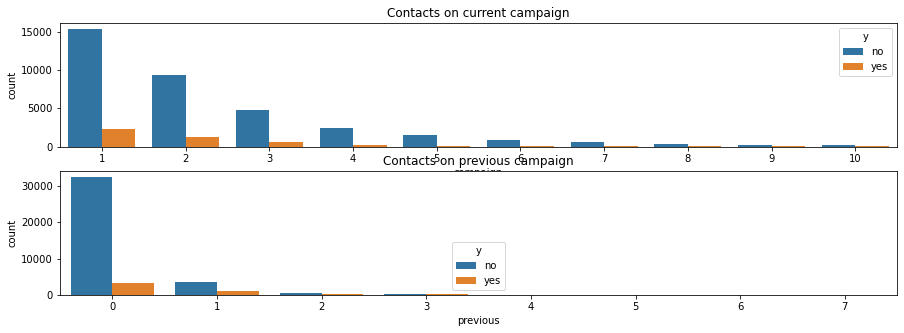

In [217]:
plt.figure(figsize = (15,5))
plt.subplot(2,1,1)
plt.title('Contacts on current campaign')
sns.countplot(df[df['campaign']<=10]['campaign'],hue = df[df['campaign']<=10]['y'])
plt.subplot(2,1,2)
plt.title('Contacts on previous campaign')
sns.countplot(df.previous,hue=  df.y)

In [218]:
#emp.var.rate
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp.var.rate', ylabel='count'>

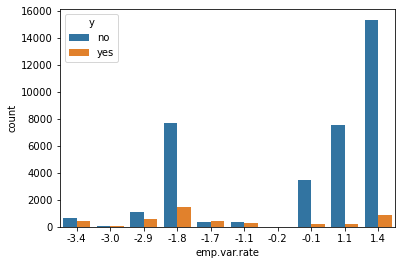

In [219]:
sns.countplot(df['emp.var.rate'], hue = df.y)

In [220]:
#cons.price.idx
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

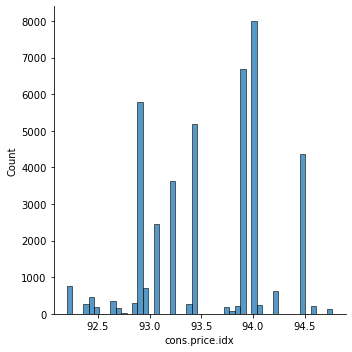

In [221]:
sns.displot(df['cons.price.idx'])

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons.price.idx', ylabel='count'>

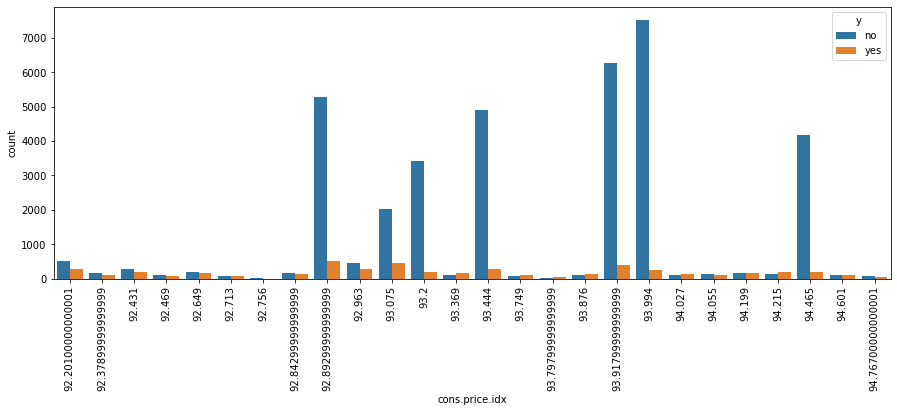

In [222]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.countplot(df['cons.price.idx'],hue = df.y)

In [223]:
#cons.conf.idx
df['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons.conf.idx', ylabel='count'>

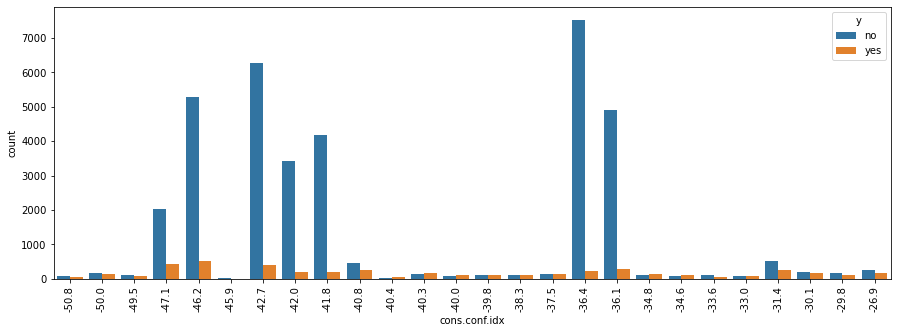

In [224]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.countplot(df['cons.conf.idx'],hue = df.y)

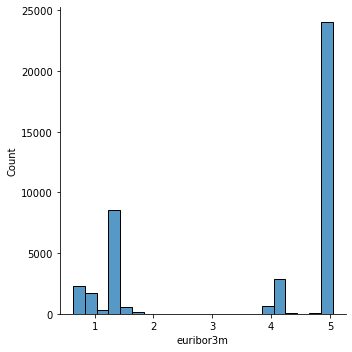

In [225]:
#euribor3m
sns.displot(df.euribor3m)

In [226]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr.employed', ylabel='count'>

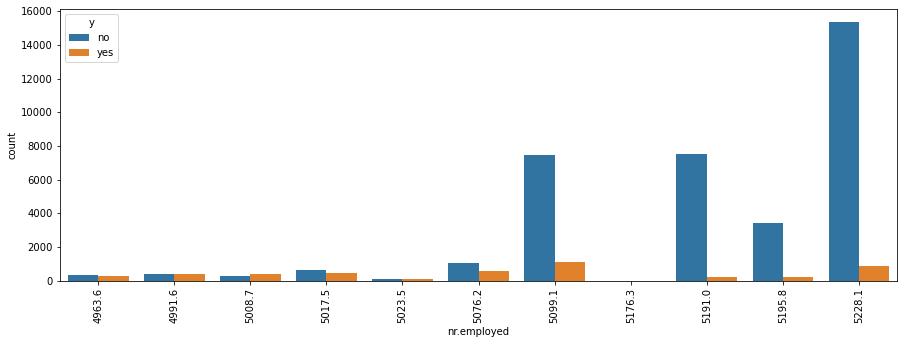

In [227]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.countplot(df['nr.employed'], hue = df.y)

In [ ]:
#PREPARING VERSION 1 OF THE DATASET

In [228]:
df_ver1 = df.copy()
del df_ver1['duration']

print('Percentage of 999 values in pdays {}'.format(round(len(df[df['pdays']==999])/len(df)*100,0)))
del df_ver1['pdays']

Percentage of 999 values in pdays 96.0


In [229]:

#cat_vars_label = ['job','education','loan','month','day_of_week','y']
#cat_vars_onehot = ['marital','default','housing','contact','poutcome']

le_raw = LabelEncoder()
for var in ['job','education','month','day_of_week','y']:
    df_ver1[var] = le_raw.fit_transform(df_ver1[var])

In [230]:
#one hot encoding

df_ver1 = pd.get_dummies(data = df_ver1, prefix = 'mar',columns = ['marital'],drop_first = True)
df_ver1 = pd.get_dummies(data = df_ver1, prefix = 'def',columns = ['default'],drop_first = True)
df_ver1 = pd.get_dummies(data = df_ver1, prefix = 'hou',columns = ['housing'],drop_first = True)
df_ver1 = pd.get_dummies(data = df_ver1, prefix = 'lon',columns = ['loan'],drop_first = True)
df_ver1 = pd.get_dummies(data = df_ver1, prefix = 'con',columns = ['contact'],drop_first = True)
df_ver1 = pd.get_dummies(data = df_ver1, prefix = 'pct',columns = ['poutcome'],drop_first = True)

In [231]:
df_ver1 = df_ver1[['age', 'job', 'education', 'month', 'day_of_week', 'campaign',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'mar_married', 'mar_single',
       'mar_unknown', 'def_unknown', 'def_yes', 'hou_unknown', 'hou_yes',
       'lon_unknown', 'lon_yes', 'con_telephone', 'pct_nonexistent',
       'pct_success','y']]

In [232]:
#getting confusion matrix and accuracy of raw dataset
x_raw = df_ver1.iloc[:,:-1]
y_raw = df_ver1.iloc[:,-1]
x_train_raw,x_test_raw,y_train_raw,y_test_raw = train_test_split(x_raw,y_raw,test_size = 0.3)
lr_raw = LogisticRegression()
lr_raw.fit(x_train_raw,y_train_raw)

y_pred_raw = lr_raw.predict(x_test_raw)
cm_raw = confusion_matrix(y_test_raw,y_pred_raw)
accu_raw = accuracy_score(y_test_raw,y_pred_raw)
print(cm_raw)
print(accu_raw)

[[10930    34]
 [ 1331    62]]
0.8895362952172857


C:\Users\abyge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [233]:
#area under the curve

auc_raw = metrics.roc_auc_score(y_test_raw,y_pred_raw)
print(auc_raw)

0.5207035987777529


In [236]:
#F1 score

f1_raw = f1_score(y_test_raw,y_pred_raw)
print(f1_raw)

0.08327736736064473


In [235]:
df_ver1

,age,job,education,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,mar_married,mar_single,mar_unknown,def_unknown,def_yes,hou_unknown,hou_yes,lon_unknown,lon_yes,con_telephone,pct_nonexistent,pct_success,y
0,56,3,0,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,57,7,3,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,1,0,0,0,0,0,1,1,0,0
2,37,7,3,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,1,0,0,1,1,0,0
3,40,0,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,1,1,0,0
4,56,7,3,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,5,7,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,1,0,1
41184,46,1,5,7,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0
41185,56,5,6,7,0,2,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,1,0,0
41186,44,9,5,7,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,1


In [237]:
# CREATING VERSION 2 - DATASET AFTER REMOVING NAs, OUTLIERS AND UNKNOWNS

In [241]:
df_ver2 = df.copy()
del df_ver2['duration']
del df_ver2['pdays']
#Missing values

df_ver2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [242]:
# Outliers

C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

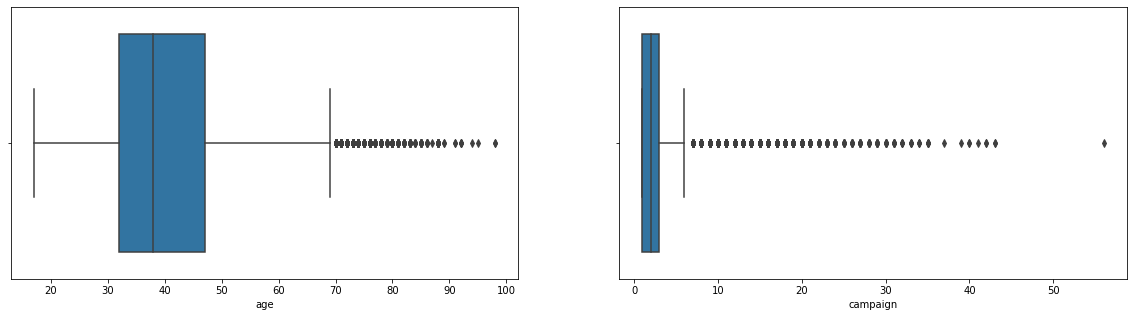

In [243]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot('age', data = df_ver2)

plt.subplot(1,2,2)
sns.boxplot('campaign', data = df_ver2)
#lets assume there are no outiers in age column from this

In [244]:
print('Outliers in Age - {} percentage'.format(round(len(df_ver2[df_ver2.age>70])/len(df_ver2),2)*100))
print('Outliers in Campaign - {} percentage'.format(round(len(df_ver2[df_ver2.campaign>10])/len(df_ver2),2)*100))

Outliers in Age - 1.0 percentage
Outliers in Campaign - 2.0 percentage


In [245]:
print('Previous rows ',len(df))
df_ver2 = df_ver2[(df_ver2['age']<70)&(df_ver2['campaign']<10)]
print('New rows ',len(df_ver2))
print('number of rows elimitated after removing is {}'.format(len(df)-len(df_ver2)))

Previous rows  41188
New rows  39627
number of rows elimitated after removing is 1561


In [246]:
#treating the unknown values

#Total number of UNKNOWN elements in each feature
#job 311 unknown
#marital 74 unknown
#education 1626 unknown
#default 8236 unknown
#housing 948 unknown
#loan 948


#checking how many elements have these all things in common

print('Rows having common Unknown values {}'.format(len(df_ver2[(df_ver2['job']=='unknown') & 
               (df_ver2['marital']=='unknown') &
                (df_ver2['education']=='unknown') &
               (df_ver2['default']=='unknown') &
               (df_ver2['loan']=='unknown') & 
               (df_ver2['housing']=='unknown')])))

#there are no rows with common unknown values

Rows having common Unknown values 0


In [247]:
#REMOVING UNKNOWN
unknown1 = list(df_ver2[df_ver2['job']=='unknown'].index)
unknown2 = list(df_ver2[df_ver2['education']=='unknown'].index)
unknown3 = list(df_ver2[df_ver2['default']=='unknown'].index)
unknown4 = list(df_ver2[df_ver2['loan']=='unknown'].index)
unknown5 = list(df_ver2[df_ver2['housing']=='unknown'].index)
unknown_indexes = list(set(unknown1+unknown2+unknown3+unknown4+unknown5))
ver1_indexes = list(df_ver2.index)
unknown_index = [x for x in ver1_indexes if x not in unknown_indexes]
df_ver2 = df_ver2.loc[unknown_index]

In [248]:
len(df_ver2)

29412

In [249]:
#LABEL ENCODING OF CATEGORICAL FEATURES AND ONE HOT ENCODING OF ORDINAL FEATURES
le_ver1 = LabelEncoder()

for var in ['job', 'education', 'loan', 'month', 'default','contact','housing','day_of_week', 'y']:
    df_ver2[var] = le_ver1.fit_transform(df_ver2[var])


df_ver2 = pd.get_dummies(data = df_ver2, prefix = 'mar',columns = ['marital'],drop_first = True)
df_ver2 = pd.get_dummies(data = df_ver2, prefix = 'pct',columns = ['poutcome'],drop_first = True)

In [250]:
df_ver2 = df_ver2[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'mar_married', 'mar_single', 'mar_unknown', 'pct_nonexistent',
       'pct_success','y']]

In [251]:
x_ver1 = df_ver2.iloc[:,:-1]
y_ver1 = df_ver2.iloc[:,-1]

In [252]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scale_ver1 = MinMaxScaler()
x_ver1 = scale_ver1.fit_transform(x_ver1)

In [253]:
#model on version one dataset

x_train_ver1,x_test_ver1,y_train_ver1,y_test_ver1 = train_test_split(x_ver1,y_ver1,test_size = 0.3)
lr_ver1 = LogisticRegression()
lr_ver1.fit(x_train_ver1,y_train_ver1)

y_pred_ver1 = lr_ver1.predict(x_test_ver1)
cm_ver1 = confusion_matrix(y_test_ver1,y_pred_ver1)
accu_ver1 = accuracy_score(y_test_ver1,y_pred_ver1)
print(cm_ver1)
print(accu_ver1)

[[7635  127]
 [ 835  227]]
0.8909791477787852


In [254]:
#area under the curve

auc_ver1 = metrics.roc_auc_score(y_test_ver1,y_pred_ver1)
print(auc_ver1)

0.5986929417593365


In [255]:
#F1 score

f1_ver1 = f1_score(y_test_ver1,y_pred_ver1)
print(f1_ver1)

0.3206214689265537


In [256]:
#CREATING VERSION 3 OF DATASET BY BINNING THE AGE COLUMN

% of admin. accepted campaign is 12.97
% of blue-collar accepted campaign is 6.89
% of technician accepted campaign is 10.83
% of services accepted campaign is 8.14
% of management accepted campaign is 11.22
% of retired accepted campaign is 25.23
% of entrepreneur accepted campaign is 8.52
% of self-employed accepted campaign is 10.49
% of housemaid accepted campaign is 10.0
% of unemployed accepted campaign is 14.2
% of student accepted campaign is 31.43
% of unknown accepted campaign is 11.21


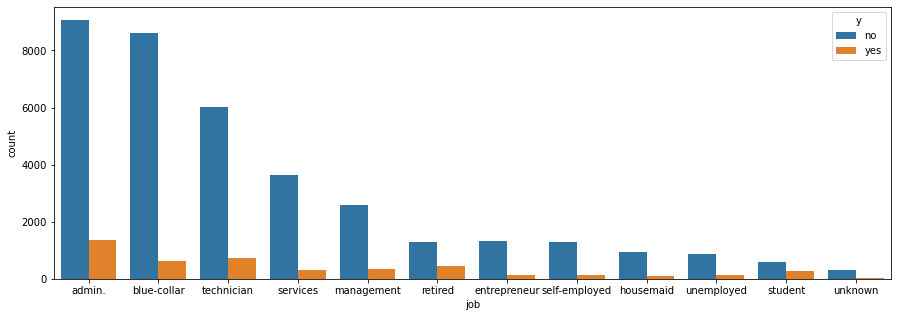

In [257]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'job', hue = 'y', order = df.job.value_counts().index,data = df )
job_titles = list(df.job.value_counts().index)
for title in job_titles:
    print('% of {} accepted campaign is {}'.format(title,round((((df[df['job']==title]['y']=='yes').sum()/len(df[df['job']==title]))*100),2)))


% of university.degree accepted campaign is 13.72
% of high.school accepted campaign is 10.84
% of basic.9y accepted campaign is 7.82
% of professional.course accepted campaign is 11.35
% of basic.4y accepted campaign is 10.25
% of basic.6y accepted campaign is 8.2
% of unknown accepted campaign is 14.5
% of illiterate accepted campaign is 22.22


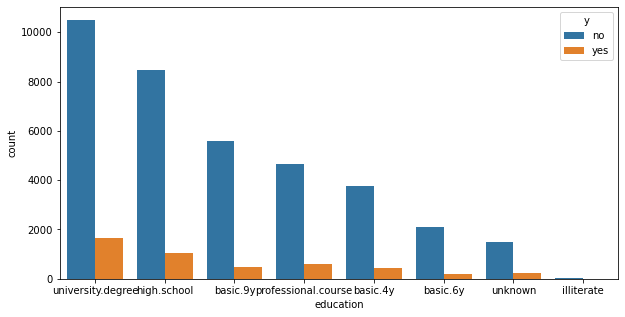

In [85]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'education', hue = 'y', order = df.education.value_counts().index,data = df )

edu_titles = list(df.education.value_counts().index)
for title in edu_titles:
    print('% of {} accepted campaign is {}'.format(title,round((((df[df['education']==title]['y']=='yes').sum()/len(df[df['education']==title]))*100),2)))

% of married accepted campaign is 10.16
% of single accepted campaign is 14.0
% of divorced accepted campaign is 10.32
% of unknown accepted campaign is 15.0


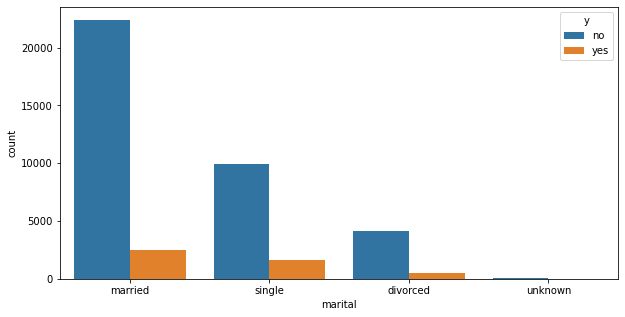

In [258]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'marital', hue = 'y', order = df.marital.value_counts().index,data = df )
mari_titles = list(df.marital.value_counts().index)
for title in mari_titles:
    print('% of {} accepted campaign is {}'.format(title,round((((df[df['marital']==title]['y']=='yes').sum()/len(df[df['marital']==title]))*100),2)))

% of may accepted campaign is 6.43
% of jul accepted campaign is 9.05
% of aug accepted campaign is 10.6
% of jun accepted campaign is 10.51
% of nov accepted campaign is 10.14
% of apr accepted campaign is 20.48
% of oct accepted campaign is 43.87
% of sep accepted campaign is 44.91
% of mar accepted campaign is 50.55
% of dec accepted campaign is 48.9


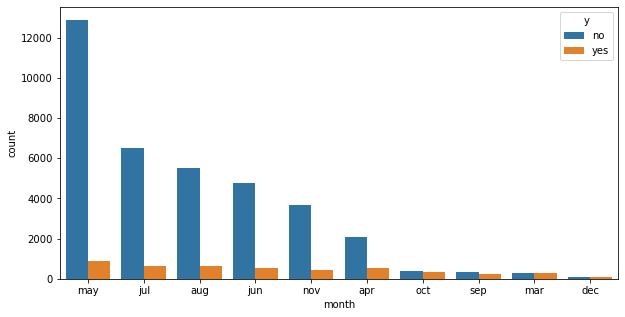

In [259]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'month', hue = 'y', order = df.month.value_counts().index,data = df )
mon_titles = list(df.month.value_counts().index)
for title in mon_titles:
    print('% of {} accepted campaign is {}'.format(title,round((((df[df['month']==title]['y']=='yes').sum()/len(df[df['month']==title]))*100),2)))

% of thu accepted campaign is 12.12
% of mon accepted campaign is 9.95
% of wed accepted campaign is 11.67
% of tue accepted campaign is 11.78
% of fri accepted campaign is 10.81


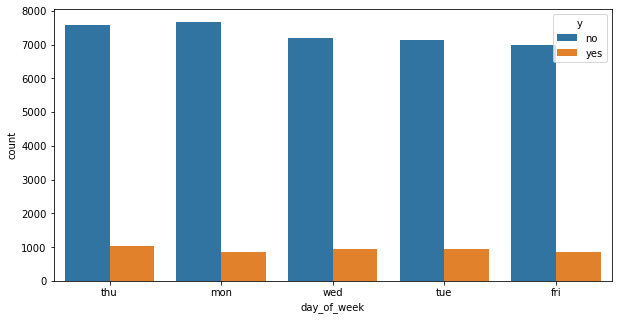

In [260]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'day_of_week', hue = 'y', order = df.day_of_week.value_counts().index,data = df )
day_titles = list(df.day_of_week.value_counts().index)
for title in day_titles:
    print('% of {} accepted campaign is {}'.format(title,round((((df[df['day_of_week']==title]['y']=='yes').sum()/len(df[df['day_of_week']==title]))*100),2)))

% of cellular accepted campaign is 14.74
% of telephone accepted campaign is 5.23


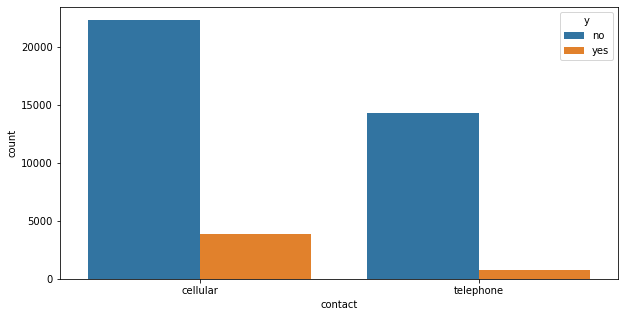

In [261]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'contact', hue = 'y', order = df.contact.value_counts().index,data = df )
con_titles = list(df.contact.value_counts().index)
for title in con_titles:
    print('% of {} accepted campaign is {}'.format(title,round((((df[df['contact']==title]['y']=='yes').sum()/len(df[df['contact']==title]))*100),2)))

% of cellular accepted campaign is 14.74
% of telephone accepted campaign is 5.23


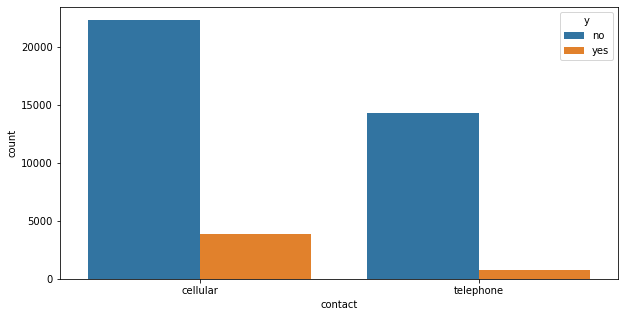

In [262]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'contact', hue = 'y', order = df.contact.value_counts().index,data = df )
con_titles = list(df.contact.value_counts().index)
for title in con_titles:
    print('% of {} accepted campaign is {}'.format(title,round((((df[df['contact']==title]['y']=='yes').sum()/len(df[df['contact']==title]))*100),2)))

% of yes accepted campaign is 11.62
% of no accepted campaign is 10.88
% of unknown accepted campaign is 10.81


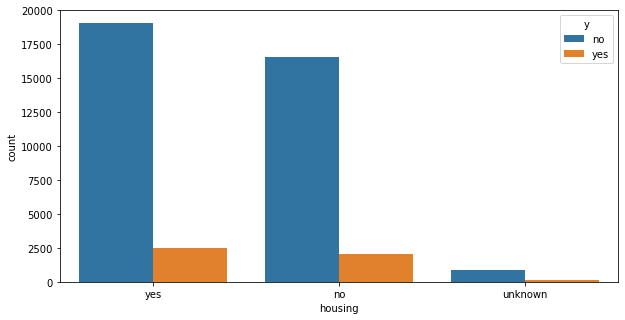

In [263]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'housing', hue = 'y', order = df.housing.value_counts().index,data = df )
hou_titles = list(df.housing.value_counts().index)
for title in hou_titles:
    print('% of {} accepted campaign is {}'.format(title,round((((df[df['housing']==title]['y']=='yes').sum()/len(df[df['housing']==title]))*100),2)))

% of no accepted campaign is 11.34
% of yes accepted campaign is 10.93
% of unknown accepted campaign is 10.81


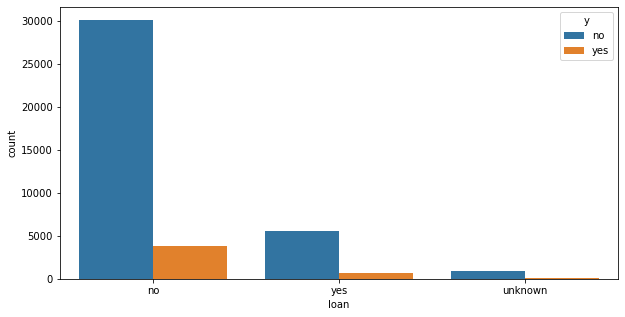

In [264]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'loan', hue = 'y', order = df.loan.value_counts().index,data = df )
loa_titles = list(df.loan.value_counts().index)
for title in loa_titles:
    print('% of {} accepted campaign is {}'.format(title,round((((df[df['loan']==title]['y']=='yes').sum()/len(df[df['loan']==title]))*100),2)))

<AxesSubplot:xlabel='age', ylabel='Density'>

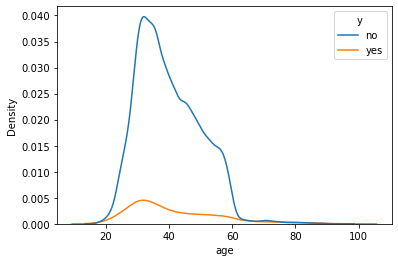

In [265]:
sns.kdeplot(x = 'age', hue = 'y', data = df)

#As the IQR range is almost overlapping age may not be a good feature for prediction

In [266]:
df_ver3 = df.copy()
del df_ver3['duration']
del df_ver3['pdays']

In [267]:
#removing outliers and unknowns
df_ver3 = df_ver3[(df_ver3['age']<70)&(df_ver3['campaign']<10)]
unknown1 = list(df_ver3[df_ver3['job']=='unknown'].index)
unknown2 = list(df_ver3[df_ver3['education']=='unknown'].index)
unknown3 = list(df_ver3[df_ver3['default']=='unknown'].index)
unknown4 = list(df_ver3[df_ver3['loan']=='unknown'].index)
unknown5 = list(df_ver3[df_ver3['housing']=='unknown'].index)
unknown_indexes = list(set(unknown1+unknown2+unknown3+unknown4+unknown5))
ver2_indexes = list(df_ver3.index)
unknown_index = [x for x in ver2_indexes if x not in unknown_indexes]
df_ver3 = df_ver3.loc[unknown_index]

<AxesSubplot:xlabel='age', ylabel='Count'>

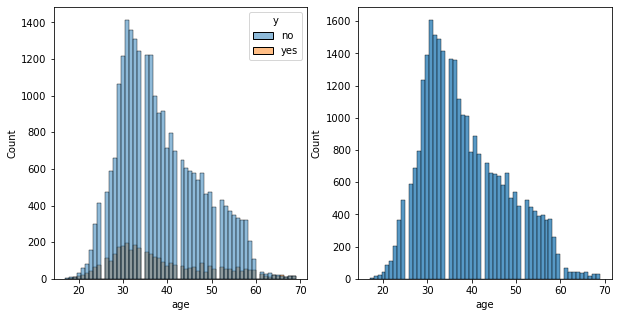

In [268]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(x = 'age', hue = 'y', data = df_ver3)
plt.subplot(1,2,2)
sns.histplot(x = 'age', data = df_ver3)


In [269]:
#from the above chart we are making bins [0,20,30,45,55,55 above]
df_ver3['age'] = pd.cut(x = df_ver3['age'], bins = [0,20,30,45,55,98], 
                        labels = ['teen','youth','adults','seniors','elders'])


<AxesSubplot:xlabel='age', ylabel='count'>

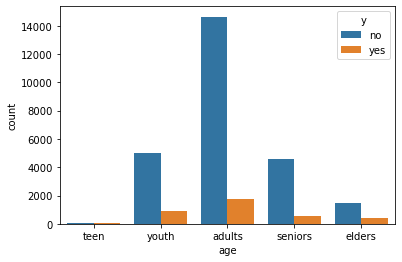

In [270]:
sns.countplot(x = 'age',hue = 'y', data = df_ver3)

In [271]:
le_ver2 = LabelEncoder()

for var in ['age','job', 'education', 'loan', 'month', 'default','contact','housing','day_of_week', 'y']:
    df_ver3[var] = le_ver2.fit_transform(df_ver3[var])


df_ver3 = pd.get_dummies(data = df_ver3, prefix = 'mar',columns = ['marital'],drop_first = True)
df_ver3 = pd.get_dummies(data = df_ver3, prefix = 'pct',columns = ['poutcome'],drop_first = True)

In [272]:
df_ver3 = df_ver3[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'mar_married', 'mar_single', 'mar_unknown', 'pct_nonexistent',
       'pct_success','y']]

In [273]:
df_ver3.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'mar_married', 'mar_single', 'mar_unknown', 'pct_nonexistent',
       'pct_success', 'y'],
      dtype='object')

In [274]:
x_ver2 = df_ver3.iloc[:,:-1]
y_ver2 = df_ver3.iloc[:,-1]

In [275]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scale_ver2 = MinMaxScaler()
x_ver2 = scale_ver2.fit_transform(x_ver2)

In [276]:
#model on version one dataset

x_train_ver2,x_test_ver2,y_train_ver2,y_test_ver2 = train_test_split(x_ver2,y_ver2,test_size = 0.3)
lr_ver2 = LogisticRegression()
lr_ver2.fit(x_train_ver2,y_train_ver2)

y_pred_ver2 = lr_ver2.predict(x_test_ver2)
cm_ver2 = confusion_matrix(y_test_ver2,y_pred_ver2)
accu_ver2 = accuracy_score(y_test_ver2,y_pred_ver2)
print(cm_ver2)
print(accu_ver2)

[[7598  112]
 [ 859  255]]
0.889959202175884


In [277]:
#area under the curve

auc_ver2 = metrics.roc_auc_score(y_test_ver2,y_pred_ver2)
print(auc_ver2)

0.6071891292755568


In [278]:
#F1 score

f1_ver2 = f1_score(y_test_ver2,y_pred_ver2)
print(f1_ver2)

0.3443619176232275


In [123]:
#CREATING VERSION 3 BY INTRODUCING INTERACTION FEATURES

In [289]:
df_ver4 = df.copy()
del df_ver4['duration']
del df_ver4['pdays']

In [290]:
#removing outliers and unknowns
df_ver4 = df_ver4[(df_ver4['age']<70)&(df_ver4['campaign']<10)]
unknown1 = list(df_ver4[df_ver4['job']=='unknown'].index)
unknown2 = list(df_ver4[df_ver4['education']=='unknown'].index)
unknown3 = list(df_ver4[df_ver4['default']=='unknown'].index)
unknown4 = list(df_ver4[df_ver4['loan']=='unknown'].index)
unknown5 = list(df_ver4[df_ver4['housing']=='unknown'].index)
unknown_indexes = list(set(unknown1+unknown2+unknown3+unknown4+unknown5))
no_outlier_indexes = list(df_ver4.index)
unknown_index = [x for x in no_outlier_indexes if x not in unknown_indexes]
df_ver4 = df_ver4.loc[unknown_index]

In [291]:
#introducing a new feature l_h from loan and housing features

df_ver4['l_h'] = np.nan
ind_both_yes = list(df_ver4[(df_ver4['loan']=='yes') & (df_ver4['housing']== 'yes')].index)
ind_loan = list(df_ver4[(df_ver4['loan']=='yes') & (df_ver4['housing']!= 'yes')].index)
ind_housing = list(df_ver4[(df_ver4['loan']!='yes') & (df_ver4['housing']== 'yes')].index)
ind_both_no = list(df_ver4[(df_ver4['loan']!='yes') & (df_ver4['housing']!= 'yes')].index)

for var in ind_both_yes:
    df_ver4['l_h'][var] = 'both_yes'
for var in ind_both_no:
    df_ver4['l_h'][var] = 'both_no'
for var in ind_housing:
    df_ver4['l_h'][var] = 'housing'
for var in ind_loan:
    df_ver4['l_h'][var] = 'loan'

<ipython-input-291-2b9e3e0f12c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ver4['l_h'][var] = 'both_yes'
C:\Users\abyge\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-291-2b9e3e0f12c5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ver4['l_h'][var] = 'both_no'
<ipython-input-291-2b9e3e0f12c5>:14: SettingWit

In [292]:
df_ver4.l_h.value_counts()

housing     13199
both_no     11604
both_yes     2753
loan         1856
Name: l_h, dtype: int64

In [293]:
df_ver4['age'] = pd.cut(x = df_ver4['age'], bins = [0,20,30,45,55,98], 
                        labels = ['teen','youth','adults','seniors','elders'])

In [294]:
del df_ver4['loan']
del df_ver4['housing']

In [295]:
le_ver3 = LabelEncoder()

for var in ['age','job', 'education', 'month', 'default','contact','day_of_week','l_h' ,'y']:
    df_ver4[var] = le_ver3.fit_transform(df_ver4[var])


df_ver4 = pd.get_dummies(data = df_ver4, prefix = 'mar',columns = ['marital'],drop_first = True)
df_ver4 = pd.get_dummies(data = df_ver4, prefix = 'pct',columns = ['poutcome'],drop_first = True)

In [296]:
df_ver4.columns

Index(['age', 'job', 'education', 'default', 'contact', 'month', 'day_of_week',
       'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'l_h', 'mar_married',
       'mar_single', 'mar_unknown', 'pct_nonexistent', 'pct_success'],
      dtype='object')

In [297]:
df_ver4 = df_ver4[['age', 'job', 'education', 'default', 'contact', 'month', 'day_of_week',
       'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'l_h', 'mar_married',
       'mar_single', 'mar_unknown', 'pct_nonexistent', 'pct_success','y']]
x_ver3 = df_ver4.iloc[:,:-1]
y_ver3 = df_ver4.iloc[:,-1]

In [298]:
#scaling
#from sklearn.preprocessing import MinMaxScaler
scale_ver3 = MinMaxScaler()
x_ver3 = scale_ver3.fit_transform(x_ver3)


In [299]:
x_train_ver3,x_test_ver3,y_train_ver3,y_test_ver3 = train_test_split(x_ver3,y_ver3,test_size = 0.3)
lr_ver3 = LogisticRegression()
lr_ver3.fit(x_train_ver3,y_train_ver3)

y_pred_ver3 = lr_ver3.predict(x_test_ver3)
cm_ver3 = confusion_matrix(y_test_ver3,y_pred_ver3)
accu_ver3 = accuracy_score(y_test_ver3,y_pred_ver3)
print(cm_ver3)
print(accu_ver3)

[[7591  120]
 [ 886  227]]
0.8859927470534905


In [300]:
#area under the curve

auc_ver3 = metrics.roc_auc_score(y_test_ver3,y_pred_ver3)
print(auc_ver3)

0.594195547765919


In [301]:
#F1 score

f1_ver3 = f1_score(y_test_ver3,y_pred_ver3)
print(f1_ver3)

0.31095890410958904


In [312]:
#VERSION 5 - BALANCING THE DATASET

In [303]:
df_ver5 = df_ver4.copy()
df_ver5.y.value_counts()

0    25743
1     3669
Name: y, dtype: int64

In [304]:
df_maj_ver4 = df_ver5[df_ver5['y']==0]
df_min_ver4 = df_ver5[df_ver5['y']== 1]
df_min_up_ver4 = resample(df_min_ver4, replace = True, n_samples = 25684)
df_ver5 = pd.concat([df_maj_ver4, df_min_up_ver4])

In [305]:
len(df_ver5)

51427

In [306]:
x_ver4 = df_ver5.iloc[:,:-1]
y_ver4 = df_ver5.iloc[:,-1]

In [307]:
scale_ver4 = MinMaxScaler()
x_ver4 = scale_ver4.fit_transform(x_ver4)

In [308]:
x_train_ver4,x_test_ver4,y_train_ver4,y_test_ver4 = train_test_split(x_ver4,y_ver4,test_size = 0.3)
lr_ver4 = LogisticRegression()
lr_ver4.fit(x_train_ver4,y_train_ver4)

y_pred_ver4 = lr_ver4.predict(x_test_ver4)
cm_ver4 = confusion_matrix(y_test_ver4,y_pred_ver4)
accu_ver4 = accuracy_score(y_test_ver4,y_pred_ver4)
print(cm_ver4)
print(accu_ver4)

[[6285 1488]
 [2601 5055]]
0.7349795839004473


C:\Users\abyge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [309]:
#area under the curve

auc_ver4 = metrics.roc_auc_score(y_test_ver4,y_pred_ver4)
print(auc_ver3)

0.594195547765919


In [310]:
#F1 score

f1_ver4 = f1_score(y_test_ver4,y_pred_ver4)
print(f1_ver4)

0.7120219733784069


In [311]:
#Applying various classification algorithms
#Naive bayes, KNN, SVM, Decision Tree, Random Forest and XGBoost

In [313]:
#NAIVE BAYES

In [325]:
from sklearn.naive_bayes import GaussianNB
ver5_nb = GaussianNB()
ver5_nb.fit(x_train_ver4,y_train_ver4)

y_pred_ver4_nb = ver5_nb.predict(x_test_ver4)
cm_ver4_nb = confusion_matrix(y_test_ver4,y_pred_ver4_nb)
accu_ver4_nb = accuracy_score(y_test_ver4,y_pred_ver4_nb)
print('Confusion Matrix - Naive Bayes')
print(cm_ver4_nb)
print('Accuracy - Naive Bayes - {}'.format(round(accu_ver4_nb,2)*100))
auc_ver4_nb = metrics.roc_auc_score(y_test_ver4,y_pred_ver4_nb)
print('AUC - Naive Bayes - {}'.format(round(auc_ver4_nb,2)*100))
f1_ver4_nb = f1_score(y_test_ver4,y_pred_ver4_nb)
print('F1 Score Naive Bayes  {}'.format(round(f1_ver4_nb,2)*100))

Confusion Matrix - Naive Bayes
[[3043 4730]
 [1118 6538]]
Accuracy - Naive Bayes - 62.0
AUC - Naive Bayes - 62.0
F1 Score Naive Bayes  69.0


In [342]:
from sklearn.neighbors import KNeighborsClassifier
ver5_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
ver5_knn.fit(x_train_ver4,y_train_ver4)

y_pred_ver4_knn = ver5_knn.predict(x_test_ver4)
cm_ver4_knn = confusion_matrix(y_test_ver4,y_pred_ver4_knn)
accu_ver4_knn = accuracy_score(y_test_ver4,y_pred_ver4_knn)
print('Confusion Matrix -KNN')
print(cm_ver4_knn)
print('Accuracy - KNN - {}'.format(round(accu_ver4_knn,2)*100))
auc_ver4_knn = metrics.roc_auc_score(y_test_ver4,y_pred_ver4_knn)
print('AUC - KNN - {}'.format(round(auc_ver4_knn,2)*100))
f1_ver4_knn = f1_score(y_test_ver4,y_pred_ver4_knn)
print('F1 Score KNN  {}'.format(round(f1_ver4_knn,2)*100))

Confusion Matrix -KNN
[[5720 2053]
 [ 434 7222]]
Accuracy - KNN - 84.0
AUC - KNN - 84.0
F1 Score KNN  85.0


In [331]:
from sklearn.svm import SVC
ver5_svc = SVC(kernel = 'linear')
ver5_svc.fit(x_train_ver4,y_train_ver4)

y_pred_ver4_svc = ver5_svc.predict(x_test_ver4)
cm_ver4_svc = confusion_matrix(y_test_ver4,y_pred_ver4_svc)
accu_ver4_svc = accuracy_score(y_test_ver4,y_pred_ver4_svc)
print('Confusion Matrix - Naive Bayes')
print(cm_ver4_svc)
print('Accuracy - Naive Bayes - {}'.format(round(accu_ver4_svc,2)*100))
auc_ver4_svc = metrics.roc_auc_score(y_test_ver4,y_pred_ver4_svc)
print('AUC - Naive Bayes - {}'.format(round(auc_ver4_svc,2)*100))
f1_ver4_svc = f1_score(y_test_ver4,y_pred_ver4_svc)
print('F1 Score Naive Bayes  {}'.format(round(f1_ver4_svc,2)*100))

Confusion Matrix - Naive Bayes
[[6544 1229]
 [2793 4863]]
Accuracy - Naive Bayes - 74.0
AUC - Naive Bayes - 74.0
F1 Score Naive Bayes  71.0


In [344]:
accuracy_score(y_test_ver4,y_pred_ver4_svc)

0.7393220558688185

In [345]:
metrics.roc_auc_score(y_test_ver4,y_pred_ver4_svc)

0.7385383382393923

In [343]:
from sklearn.tree import DecisionTreeClassifier
ver5_dtc = DecisionTreeClassifier(criterion = 'entropy')
ver5_dtc.fit(x_train_ver4,y_train_ver4)

y_pred_ver4_dtc = ver5_dtc.predict(x_test_ver4)
cm_ver4_dtc = confusion_matrix(y_test_ver4,y_pred_ver4_dtc)
accu_ver4_dtc = accuracy_score(y_test_ver4,y_pred_ver4_dtc)
print('Confusion Matrix - SVM Classifier')
print(cm_ver4_dtc)
print('Accuracy - SVM Classifier - {}'.format(round(accu_ver4_dtc,2)*100))
auc_ver4_dtc = metrics.roc_auc_score(y_test_ver4,y_pred_ver4_dtc)
print('AUC - SVM Classifier - {}'.format(round(auc_ver4_dtc,2)*100))
f1_ver4_dtc = f1_score(y_test_ver4,y_pred_ver4_dtc)
print('F1 Score SVM Classifier  {}'.format(round(f1_ver4_dtc,2)*100))

Confusion Matrix - SVM Classifier
[[6654 1119]
 [ 107 7549]]
Accuracy - SVM Classifier - 92.0
AUC - SVM Classifier - 92.0
F1 Score SVM Classifier  92.0


In [334]:
from sklearn.ensemble import RandomForestClassifier
ver5_rfc = RandomForestClassifier(n_estimators = 10,criterion = 'entropy')
ver5_rfc.fit(x_train_ver4,y_train_ver4)

y_pred_ver4_rfc = ver5_rfc.predict(x_test_ver4)
cm_ver4_rfc = confusion_matrix(y_test_ver4,y_pred_ver4_rfc)
accu_ver4_rfc = accuracy_score(y_test_ver4,y_pred_ver4_rfc)
print('Confusion Matrix - Random Forest Classifier')
print(cm_ver4_rfc)
print('Accuracy - Random Forest Classifier - {}'.format(round(accu_ver4_rfc,2)*100))
auc_ver4_rfc = metrics.roc_auc_score(y_test_ver4,y_pred_ver4_rfc)
print('AUC - Random Forest Classifier - {}'.format(round(auc_ver4_rfc,2)*100))
f1_ver4_rfc = f1_score(y_test_ver4,y_pred_ver4_rfc)
print('F1 Score Random Forest Classifier  {}'.format(round(f1_ver4_rfc,2)*100))

Confusion Matrix - Random Forest Classifier
[[6915  858]
 [  88 7568]]
Accuracy - Random Forest Classifier - 94.0
AUC - Random Forest Classifier - 94.0
F1 Score Random Forest Classifier  94.0


In [341]:
from sklearn.ensemble import GradientBoostingClassifier
ver5_xgb = GradientBoostingClassifier()
ver5_xgb.fit(x_train_ver4,y_train_ver4)

y_pred_ver4_xgb = ver5_xgb.predict(x_test_ver4)
cm_ver4_xgb = confusion_matrix(y_test_ver4,y_pred_ver4_xgb)
accu_ver4_xgb = accuracy_score(y_test_ver4,y_pred_ver4_xgb)
print('Confusion Matrix - Gradient Boosting Classifier')
print(cm_ver4_xgb)
print('Accuracy - Gradient Boosting Classifier - {}'.format(round(accu_ver4_xgb,2)*100))
auc_ver4_xgb = metrics.roc_auc_score(y_test_ver4,y_pred_ver4_xgb)
print('AUC - Gradient Boosting Classifier - {}'.format(round(auc_ver4_xgb,2)*100))
f1_ver4_xgb = f1_score(y_test_ver4,y_pred_ver4_xgb)
print('F1 Score Gradient Boosting Classifier  {}'.format(round(f1_ver4_xgb,2)*100))

Confusion Matrix - Gradient Boosting Classifier
[[6487 1286]
 [2532 5124]]
Accuracy - Gradient Boosting Classifier - 75.0
AUC - Gradient Boosting Classifier - 75.0
F1 Score Gradient Boosting Classifier  73.0


In [346]:
accuracy_score(y_test_ver4,y_pred_ver4_xgb)

0.7525439108172921

In [347]:
metrics.roc_auc_score(y_test_ver4,y_pred_ver4_xgb)

0.7519172547686368